In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import statsmodels.stats.multicomp as multi
from scipy.stats import bootstrap
from statsmodels.stats.multicomp import pairwise_tukeyhsd as multi_pairwise_tukeyhsd
from scipy.stats import ks_2samp
import seaborn as sns
from abbasilab_v1dd import ARTIFACT_DIR
from allen_v1dd.client import OPhysClient
from pathlib import Path

/home/roozbehf/anaconda3/envs/abbasilab-v1dd/lib/python3.10/site-packages/standard_transform/datasets.py:30: UserWarning: Optimal rotation is not uniquely or poorly defined for the given sets of vectors.
  rot, _ = R.align_vectors(np.array([[0, 1, 0]]), [up])


In [2]:
colors = [
    '#FF5733',  # Red
    '#33FF57',  # Green
    '#3357FF',  # Blue
    '#F1C40F',  # Yellow
    '#9B59B6',  # Purple
    'cyan',     # Cyan, named color
    'magenta',  # Magenta, named color
    '#FFC300',  # Gold
    '#DAF7A6',  # Light Green
    '#581845',  # Dark Purple
    '#34495E',  # Asphalt
    '#16A085',  # Green Sea
    '#E74C3C',  # Red Orange
    '#2980B9',  # Belize Hole Blue
    'chocolate' # Chocolate, named color
]

mouse_colors = {'slc2': 'red', 'slc4': 'blue', 'slc5': 'orange', 'teto1': 'green'}
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]
z_groups_high_to_low = [[650, 675, 700, 725], [575, 600, 625], [500, 525, 550], [482, 498, 514], [434, 450, 466], \
    [386, 402, 418], [338, 354, 370], [290, 306, 322], [242, 258, 274], [194, 210, 226], [146, 162, 178], [98, 114, 130], [50, 66, 82]]


In [3]:
# cell_info = pd.read_csv(ARTIFACT_DIR / "all_metrics_240503.csv")

In [142]:
csv_tag ="_240508"

slc2 = pd.read_csv(ARTIFACT_DIR /f'slc2_all_stim_metric{csv_tag}.csv')
slc2.insert(1, 'mouse_id', "slc2", True)
slc2['column'] = slc2['column'].astype(str)
slc2['volume'] = slc2['volume'].astype(str)
slc2['col_vol'] = slc2['col_vol'].astype(str)
slc2['2p3p'] = slc2['2p3p'].astype(str)
slc2 = slc2[~((slc2["column"]=='1') & (slc2["2p3p"]=='2'))]
slc2 = slc2[slc2["valid_not_duplicate"]]

slc4 = pd.read_csv(ARTIFACT_DIR/f'slc4_all_stim_metric{csv_tag}.csv')
slc4.insert(1, 'mouse_id', "slc4", True)
slc4['column'] = slc4['column'].astype(str)
slc4['volume'] = slc4['volume'].astype(str)
slc4['col_vol'] = slc4['col_vol'].astype(str)
slc4['2p3p'] = slc4['2p3p'].astype(str)
slc4 = slc4[~((slc4["column"]=='1') & (slc4["2p3p"]=='2'))]
slc4 = slc4[slc4["valid_not_duplicate"]]

slc5 = pd.read_csv(ARTIFACT_DIR/f'slc5_all_stim_metric{csv_tag}.csv')
slc5.insert(1, 'mouse_id', "slc5", True)
slc5['column'] = slc5['column'].astype(str)
slc5['volume'] = slc5['volume'].astype(str)
slc5['col_vol'] = slc5['col_vol'].astype(str)

slc5['2p3p'] = slc5['2p3p'].astype(str)
slc5 = slc5[~((slc5["column"]=='1') & (slc5["2p3p"]=='2'))]
slc5 = slc5[slc5["valid_not_duplicate"]]

teto1 = pd.read_csv(ARTIFACT_DIR/f'teto1_all_stim_metric{csv_tag}.csv')
teto1.insert(1, 'mouse_id', "teto1", True)
teto1['column'] = teto1['column'].astype(str)
teto1['volume'] = teto1['volume'].astype(str)
teto1['col_vol'] = teto1['col_vol'].astype(str)
teto1['2p3p'] = teto1['2p3p'].astype(str)
teto1 = teto1[~((teto1["column"]=='1') & (teto1["2p3p"]=='2'))]
teto1 = teto1[teto1["valid_not_duplicate"]]

# append 4 mice info into one pandas dataframe
cell_info = slc2.append(slc4).append(slc5).append(teto1)
# remove column 1 2p and include only valid non duplicate cells
cell_info['column'] = cell_info['column'].astype(str)
cell_info['volume'] = cell_info['volume'].astype(str)
cell_info['col_vol'] = cell_info['col_vol'].astype(str)

cell_info['2p3p'] = cell_info['2p3p'].astype(str)
# cell_info = cell_info[~((cell_info["column"]=='1') & (cell_info["2p3p"]=='2'))]
cell_info = cell_info[cell_info["valid_not_duplicate"]]

/tmp/ipykernel_3242606/2244379465.py:3: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  slc2 = pd.read_csv(ARTIFACT_DIR /f'slc2_all_stim_metric{csv_tag}.csv')
/tmp/ipykernel_3242606/2244379465.py:12: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  slc4 = pd.read_csv(ARTIFACT_DIR/f'slc4_all_stim_metric{csv_tag}.csv')
/tmp/ipykernel_3242606/2244379465.py:21: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  slc5 = pd.read_csv(ARTIFACT_DIR/f'slc5_all_stim_metric{csv_tag}.csv')
/tmp/ipykernel_3242606/2244379465.py:31: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  teto1 = pd.read_csv(ARTIFACT_DIR/f'teto1_all_stim_metric{csv_tag}.csv')


In [143]:
cell_info.keys()

Index(['Unnamed: 0.1', 'mouse_id', 'Unnamed: 0', 'valid_cell_index',
       'cell_index', 'col_vol', 'column', 'volume', 'plane', 'x', 'y', 'z',
       '2p3p', 'on_score', 'off_score', 'on_center_x', 'on_center_y',
       'off_center_x', 'off_center_y', 'on_center_wx', 'on_center_wy',
       'off_center_wx', 'off_center_wy', 'on_center_h', 'off_center_h',
       'on_area', 'off_area', 'on_averaged_response_at_receptive_field',
       'off_averaged_response_at_receptive_field',
       'percentage_res_trial_4_locally_sparse_noise',
       'frac_res_trial_4_locally_sparse_noise', 'frac_res_to_on',
       'frac_res_to_off', 'total_responsive_trials_all_pixels', 'mu_spont',
       'max_spont', 'min_spont', 'is_responsive', 'has_rf_mean_std',
       'has_rf_chi2', 'max_n_responsive_trials_on', 'is_responsive_to_on',
       'has_rf_mean_std_on', 'has_rf_v2_on', 'has_rf_zscore_on',
       'max_n_responsive_trials_off', 'is_responsive_to_off',
       'has_rf_mean_std_off', 'has_rf_v2_off', 'has

In [11]:
n_stimulus_pairs = 8
n_bootstrap = 1000
n_samples = 50
n_z_groups = len(z_groups_high_to_low)
n_mice = len(mice)
bootstrapped_data = np.zeros((n_stimulus_pairs, n_bootstrap, n_z_groups, n_mice))

            
fontsize = 14
total_samples_per_group = [0] * len(z_groups_high_to_low)

titles = ['ns12_ls', 'ns118_ls', 'nm_ls']
for subplot_idx in range(n_stimulus_pairs):   
    for m, mouse_id in enumerate(mice):
 
        for z, z_group in enumerate(z_groups_high_to_low):
                plane = (cell_info['z'].isin(z_group)) & (cell_info['mouse_id']==mice[m])
                plane_df = cell_info[plane]
                
                for b in range(n_bootstrap):
                    sample_indices = np.random.choice(range(len(plane_df)), size=n_samples, replace=True)
                    sample_plane_df = plane_df.iloc[sample_indices]

                    if subplot_idx == 0:
                        stim_plane = (sample_plane_df['ns12_ls'])
                    elif subplot_idx == 1:
                        stim_plane = (sample_plane_df['ns118_ls'])
                    elif subplot_idx == 2:
                        stim_plane = (sample_plane_df['nm_ls'])

                    stim_plane_df = stim_plane

                    if len(stim_plane_df):
                        data = stim_plane_df.dropna().to_numpy()
                        bootstrapped_data[subplot_idx, b, z, m] = np.median(data) 

In [12]:
def perform_anova(filtered_data):

    f_value, p_value = stats.f_oneway(*filtered_data)
    return f_value, p_value

def perform_tukeys_hsd_and_top_pairs(filtered_data):

    # Combining all groups into a single dataset
    all_data = np.concatenate(filtered_data)

    # Creating group labels accounting for different sizes
    groups = np.concatenate([np.full(len(sublist), i) for i, sublist in enumerate(filtered_data)])

    # Perform Tukey's HSD test
    tukey_result = multi.pairwise_tukeyhsd(all_data, groups, 0.05)

    # Convert Tukey's result to a DataFrame for easier processing
    tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

    # Filter for significant differences
    significant_pairs = tukey_df[tukey_df['p-adj'] < 0.05]

    # Sort by p-adj and take top 3 significant differences
    significant_pairs_sorted = significant_pairs.sort_values(by='p-adj')


    print("\nTukey's HSD test result:")
    print(tukey_result)
    print(f"\nPairs with p-values < 0.05: {len(significant_pairs_sorted)} found")
    print(significant_pairs_sorted)
    
    return tukey_result, significant_pairs_sorted.to_records(index=False)

/tmp/ipykernel_3161440/87421710.py:40: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_tick_labels = [np.int(np.mean(group)) for group in z_groups_high_to_low]


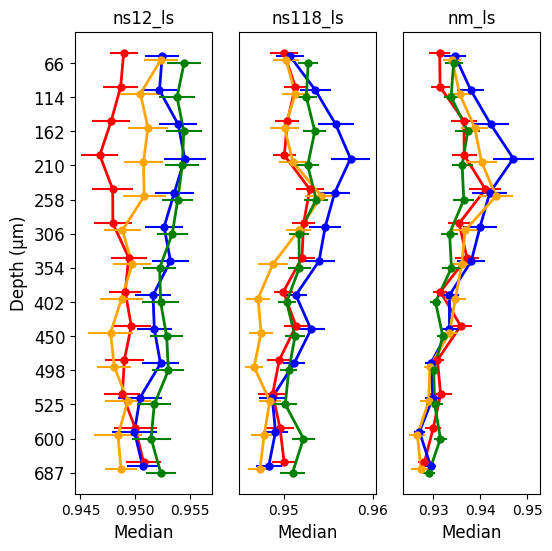

In [15]:
n_stimulus_pairs=3
jitter_amount = 0.15
num_elements = len(mice)
jitter_step = jitter_amount * 2 / (num_elements - 1)
jitter_values = np.linspace(-jitter_amount, jitter_amount, num_elements)
fixed_jitters = np.tile(jitter_values, (n_z_groups, 1))

fig = plt.figure(figsize=(6, 6))
for s in range(n_stimulus_pairs):
    ax = plt.subplot(1, n_stimulus_pairs, s + 1)
    
    for m, mouse_id in enumerate(mice):

        means = []
        std_errors = []
        mouse_color = mouse_colors[mice[m]]
        
        for z in range(n_z_groups):
            # Calculate the mean and standard deviation for each z_group's bootstrap data
            bootstrapped_values = bootstrapped_data[s, :, z, m]
            mean = np.mean(bootstrapped_values)
            std = np.std(bootstrapped_values)
            
            means.append(mean)
            std_errors.append(std)
        
        # Plot means with standard deviation error bars
        # Plot means with standard deviation error bars
        base_y_positions = np.arange(1, len(means) + 1)
        jitter = fixed_jitters[:, 3-m]  # Select the jitter for this mouse across all z_groups
        y_positions = base_y_positions + jitter
        plt.errorbar(means, y_positions, xerr=std_errors, fmt='o', color=mouse_color, ecolor=mouse_color, capsize=0, markersize=5)
        plt.plot(means, y_positions, color=mouse_color, linewidth=2)  # Connecting line

        plt.xlabel('Median', fontsize=12)
        plt.title(titles[s])
        # plt.xlim([0.6, 1])
    
    if s == 0:
        y_tick_labels = [np.int(np.mean(group)) for group in z_groups_high_to_low]
        plt.yticks(y_positions, y_tick_labels, fontsize=12)
        plt.ylabel("Depth (µm)", fontsize=12)
    else:
        plt.yticks([])

# plt.show()
# fig.savefig(f"ns_nm_depth_plots.eps", format='eps')


### Make example timetrace NS Set 1

In [7]:
mouse_id = 'M427836'  #slc5
col_vol_id = "11"
plane = 2
plane_name = f"Plane_{plane}"

In [28]:
from allen_v1dd.stimulus_analysis.natural_scenes import NaturalScenes

DATA_DIR = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/")
assert DATA_DIR.exists()
DATA_DIR.resolve()
session = client.load_ophys_session(f"{mouse_id}_{col_vol_id}")
ns = NaturalScenes(session, plane, trace_type = "events")

traces = session.get_traces(plane, trace_type="dff")
dff = traces.values   
valid_dff = dff[ns.is_roi_valid, :]

event_traces = session.get_traces(plane, trace_type="events")
event = event_traces.values
valid_event = event[ns.is_roi_valid, :]

times = traces.indexes['time']

In [29]:
valid_dff.shape

(109, 21707)

In [9]:
cell_num = 6

In [115]:
stim_table_tuple = session.get_stimulus_table("natural_images_12")
stim_table = stim_table_tuple[0]

import h5py
H5_DIR = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/v1dd_stimulus_analyses/stimulus_analyses_v2.h5")
with h5py.File(H5_DIR, 'r') as f:
    
    is_roi_valid = f[mouse_id][col_vol_id][f"Plane_{plane-1}"]["is_roi_valid"][()]               
    pref_img_index = f[mouse_id][col_vol_id][f"Plane_{plane-1}"]["natural_images_12"]["pref_img"][:]
    pref_img_index_valid = pref_img_index[is_roi_valid]

In [129]:
mice = ['slc2', 'slc4', 'slc5', 'teto1']
mouse_ids = ["M409828", "M416296", "M427836", "M438833"]

In [149]:
col_vol_id = "16"

In [160]:
plane = 0

In [170]:
one_cell_info = cell_info[(cell_info["mouse_id"] == mice[mouse_ids.index(mouse_id)]) &\
                          (cell_info["col_vol"] == str(col_vol_id)) & \
                          (cell_info["plane"] == plane) &\
                          (cell_info["frac_res_to_ns118"] == 1) &\
                          (cell_info["ns118_ls"] > 0.8)] 
                        #   (cell_info["valid_cell_index"] == cell_num)]
one_cell_info

,Unnamed: 0.1,mouse_id,Unnamed: 0,valid_cell_index,cell_index,col_vol,column,volume,plane,x,...,dgw_pref_dir,dgf_osi,dgw_osi,dgf_dsi,dgw_dsi,dgf_ls,dgw_ls,ns12_ls,ns118_ls,nm_ls


In [167]:
cell_num = one_cell_info["valid_cell_index"]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


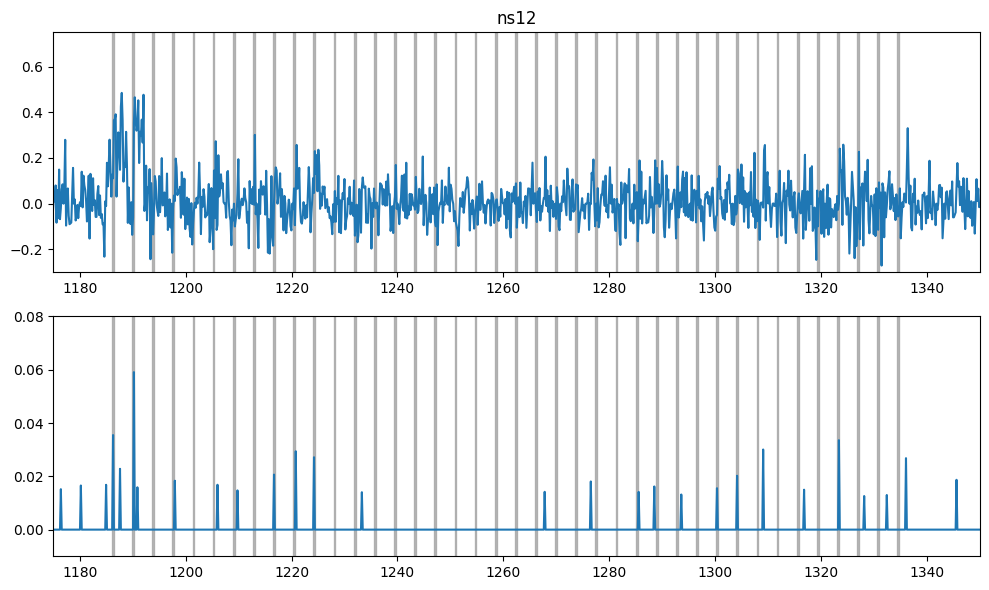

In [116]:
pref_img_index_valid_cell = pref_img_index_valid[cell_num]
cond = stim_table[(stim_table["image_index"]==pref_img_index_valid_cell)].reset_index(drop=True)
cond['start_index'] = cond['start'].apply(lambda t: np.argmin(np.abs(times - t)))
cond['end_index'] = cond['end'].apply(lambda t: np.argmin(np.abs(times - t)))
        
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(times, valid_dff[cell_num, :])
for _, row in cond.iterrows():
    plt.axvspan(times[row['start_index']], times[row['end_index']], color='gray', alpha=0.5)
plt.ylim([-0.3, 0.75])
plt.xlim([1175, 1350])
plt.title("ns12")

plt.subplot(2, 1, 2)
plt.plot(times, valid_event[cell_num, :])
for _, row in cond.iterrows():
    plt.axvspan(times[row['start_index']], times[row['end_index']], color='gray', alpha=0.5)
plt.ylim([-0.01, 0.08])
plt.xlim([1175, 1350])
plt.tight_layout()

plt.savefig("ns12_tt.eps", format='eps', dpi=1000)

In [207]:
mouse_id = 'M427836'
col_vol_id = "16"
plane = 0

one_cell_info = cell_info[(cell_info["mouse_id"] == mice[mouse_ids.index(mouse_id)]) &\
                          (cell_info["col_vol"] == str(col_vol_id)) & \
                          (cell_info["plane"] == plane) &\
                          (cell_info["frac_res_to_ns118"] == 1) &\
                          (cell_info["ns118_ls"] > 0.8)] 
cell_num = one_cell_info["valid_cell_index"]

In [208]:
stim_table_tuple = session.get_stimulus_table("natural_images")
stim_table = stim_table_tuple[0]

import h5py
H5_DIR = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/v1dd_stimulus_analyses/stimulus_analyses_v2.h5")
with h5py.File(H5_DIR, 'r') as f:
    
    is_roi_valid = f[mouse_id][col_vol_id][f"Plane_{plane}"]["is_roi_valid"][()]               
    pref_img_index = f[mouse_id][col_vol_id][f"Plane_{plane}"]["natural_images"]["pref_img"][:]
    pref_img_index_valid = pref_img_index[is_roi_valid]
    frac_resp = f[mouse_id][col_vol_id][f"Plane_{plane}"]["natural_images"]['frac_responsive_trials'][is_roi_valid]

In [209]:
frac = one_cell_info["frac_res_to_ns118"].iloc[0]
ls = one_cell_info["ns118_ls"].iloc[0]

In [210]:
stim_table

,start,end,image,image_index
0,2105.624023,2105.924072,0,0
1,2105.940918,2106.241211,1,1
2,2106.257812,2106.558105,2,2
3,2106.574707,2106.875000,3,3
4,2106.891602,2107.191895,4,4
...,...,...,...,...
939,2403.221680,2403.521729,231,109
940,2403.538574,2403.838867,232,73
941,2403.855469,2404.155762,233,74
942,2404.172363,2404.472656,234,63


In [212]:
pref_img_index_valid_cell

array([45])

In [215]:
cond

,start,end,image,image_index,start_index,end_index
0,2119.885986,2120.186035,45,45,12897,12899
1,2143.338623,2143.638916,119,45,13040,13042
2,2194.681396,2194.981689,45,45,13352,13354
3,2218.134277,2218.434570,119,45,13495,13497
4,2269.477051,2269.777344,45,45,13807,13809
5,2292.929932,2293.229980,119,45,13950,13952
6,2344.272461,2344.572754,45,45,14262,14264
7,2367.725342,2368.025635,119,45,14405,14407


ValueError: x and y must have same first dimension, but have shapes (21707,) and (1, 21707)

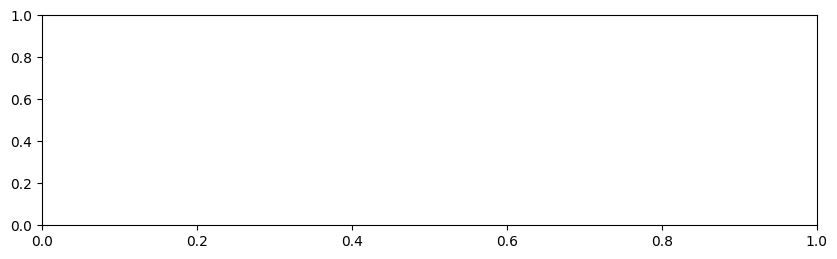

In [214]:
pref_img_index_valid_cell = pref_img_index_valid[cell_num]
cond = stim_table[(stim_table["image_index"]==pref_img_index_valid_cell[0])].reset_index(drop=True)
cond['start_index'] = cond['start'].apply(lambda t: np.argmin(np.abs(times - t)))
cond['end_index'] = cond['end'].apply(lambda t: np.argmin(np.abs(times - t)))
        
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(times, valid_dff[cell_num, :])
for _, row in cond.iterrows():
    plt.axvspan(times[row['start_index']], times[row['end_index']], color='gray', alpha=0.5)
plt.ylim([-0.3, 0.75])
plt.xlim([2100, 2400])
plt.title(f"ns118 frac rep={frac} ls={ls}")

plt.subplot(2, 1, 2)
plt.plot(times, valid_event[cell_num, :])
for _, row in cond.iterrows():
    plt.axvspan(times[row['start_index']], times[row['end_index']], color='gray', alpha=0.5)
plt.ylim([-0.01, 0.08])
plt.xlim([2100, 2400])
plt.tight_layout()

plt.savefig("ns118_tt.eps", format='eps', dpi=1000)

### Natural movie

The natural movie stimulus for the slc2 and TetO1 mice consisted of 3,600 frames (with 30 Hz frame rate) and was presented 8 times. For slc4 and slc5 mice, the natural movie stimulus consisted of 900 frames presented 30 times.


mice = ['slc2', 'slc4', 'slc5', 'teto1']

mouse_ids = ["M409828", "M416296", "M427836", "M438833"]

slc2: 3600 frames x 8 times (total 29700)

slc4: 3600 frames x 9 times (total 29700)

slc5: 900 frames x 10 times (total 9000)

teto1: 900 frames x 30 times (total 27000)

In [119]:
mouse_id = 'M427836'  #slc5

col_vol_id = "11"
plane = 2
plane_name = f"Plane_{plane}"
client =  OPhysClient(DATA_DIR)
session = client.load_ophys_session(f"{mouse_id}_{col_vol_id}")
stim_table_tuple = session.get_stimulus_table("natural_movie")
stim_table = stim_table_tuple[0]
len(stim_table)

9000

In [120]:
len(stim_table.frame.unique())

900

In [121]:
import h5py
H5_DIR = Path("/home/roozbehf/Documents/v1dd_arefeh/V1_DD_NWBs/v1dd_stimulus_analyses/stimulus_analyses_v2.h5")
with h5py.File(H5_DIR, 'r') as f:
    
    is_roi_valid = f[mouse_id][col_vol_id][f"Plane_{plane-1}"]["is_roi_valid"][()]               
    pref_img_index = f[mouse_id][col_vol_id][f"Plane_{plane-1}"]["natural_movie"]["pref_img"][:]
    pref_img_index_valid = pref_img_index[is_roi_valid]

pref_img_index_valid_cell = pref_img_index_valid[cell_num]
cond = stim_table[(stim_table["frame"]==pref_img_index_valid_cell)].reset_index(drop=True)
cond['start_index'] = cond['start'].apply(lambda t: np.argmin(np.abs(times - t)))
cond['end_index'] = cond['end'].apply(lambda t: np.argmin(np.abs(times - t)))

len(cond)

10

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


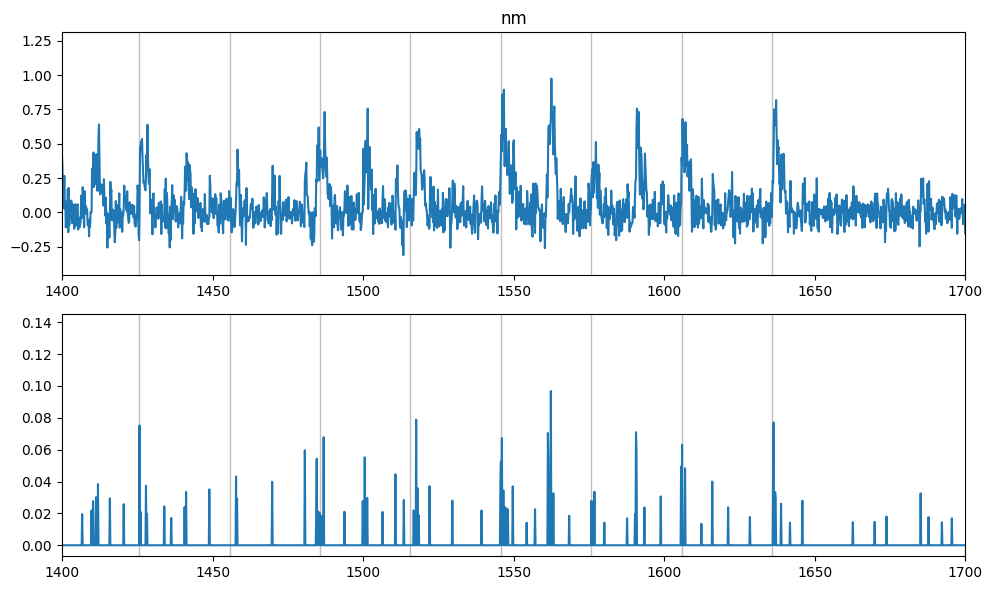

In [122]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(times, valid_dff[cell_num, :])
for _, row in cond.iterrows():
    plt.axvspan(times[row['start_index']], times[row['end_index']], color='gray', alpha=0.5)
# plt.ylim([-0.3, 0.75])
plt.xlim([1400, 1700])
plt.title("nm")

plt.subplot(2, 1, 2)
plt.plot(times, valid_event[cell_num, :])
for _, row in cond.iterrows():
    plt.axvspan(times[row['start_index']], times[row['end_index']], color='gray', alpha=0.5)
# plt.ylim([-0.01, 0.08])
plt.xlim([1400, 1700])
plt.tight_layout()
plt.savefig("nm_tt.eps", format='eps', dpi=1000)